In [ ]:
!python -m pip install pandas
from numpy import *
from pandas import DataFrame  
from sympy.parsing.sympy_parser import *

In [ ]:
x=sp.symbols("x")
pf=input("ingrese la funcion: ")
f=parse_expr(pf,locals())
print(f.subs(x,1))
#print(evalf(f,subs={x:0}))
sp.series(f)

ingrese la funcion: x**2+x
2


x**2 + x

In [19]:
import sympy as sp
import cmath as cm
x = sp.symbols("x")
sp.expand((x+2.5j)*(x-2.5j)*(x+5.3j)*(x-5.3j))

In [ ]:
## interpolacion modificado
funcion = input("ingrese la funcion en notacion de python: ")
while True:
  ## Ingreso datos:
  
  # Ingreso limite inferior
  while True:
    a0 = input("ingrese el limite inferior: ")
    try:
      a=float(a0)
      break
    except ValueError:
      print("ingrese un numero valido")
  
  # Ingreso limite superior
  while True:
    b0 = float(input("ingrese el limite superior: "))
    try:
      b=float(b0)
      break
    except ValueError:
      print("ingrese un numero valido")
  
  # Evaluar orden
  if a >= b:
    print("Valores incorrectos, por favor ingrese un valor de a que sea menor a un valor b.")
    
  # Evaluar continuidad
  #elif continuo(a,b) == False:
    #print("la funcion no es continua en este intervalo, ingrese un intervalo que si cumpla esta condicion.")
    
  else:
    # Ingreso cifras significativas
    while True:
      n = int(input("ingrese la cantidad de cifras significativas para la aproximacion final: "))
      try:
        CS=int(n)
        break
      except ValueError:
        print("ingrese un numero valido")
    
       
    ## Variables de inicio
    
    Es = 0.5*(10**(2-CS)) # Error de referencia
    a1=a
    b1=b
    Fa = f(a1)
    Fb = f(b1)
    it = 0 # Cantidad de iteraciones totales
    ia = 0 # Cantidad de repeticiones del limite inferior
    ib = 0 # Cantidad de repeticiones del limite superior
    Xf = a1 # Comparacion inicial
    df = DataFrame.from_dict({"0":[a1,b1,"","",""]},orient="index",columns=["a", "b", "Xm", "f(Xm)", "Ea(%)"]) # tabla
    
    ## Inicio de las iteraciones
    while True:
      Xi = Xf # Valor previo
      Xf = b1 + ((-Fb)*(a1-b1)/(Fa-Fb)) 
      Fi = f(Xi)
      Ff = f(Xf) 
      it += 1
      Xr = round(Xf,CS+1)
      if Ff == 0: # Condicion de paro: caso que se obtenga el cero exacto
        df.loc[it]=[round(a1,4),round(b1,4),Xr,round(Ff,4),""] # añade fila a la tabla
        result = "el cero se encuentra en: {:} con un error de: {:.2f}% en {:} iteraciones".format(Xr,abs(Ff)*100,it)
        break
      
      if it == 1000: # Condicion de paro: Limite maximo de iteraciones totales
          result = "no se encontro ninguna solucion para la tolerancia luego de 1000 iteraciones"
          break
      
      if Xf != 0:
        Ea = abs((Xi-Xf)/Xf)*100 # Error aproximado
        
        if Ea < Es: # Condicion de paro: error aproximado valido
          df.loc[it]=[round(a1,4),round(b1,4),Xr,Ff,Ea] # añade fila a la tabla
          result = "el cero se encuentra en: {:} con un error de: {:.2f}% en {:} iteraciones".format(Xr,abs(Ff)*100,it)
          break
        
      if Ff * Fa < 0: # Se cambia de limite superior
        b1 = Xf
        Fb = f(b1)
        ib = 0
        ia += 1
        if ia >= 2: # Se excede las iteraciones con igual limite inferior
          Fa /= 2
      
      elif Ff * Fb < 0: # Se cambia de limite inferior
        a1 = Xf
        Fa = f(a1)
        ia = 0
        ib += 1
        if ib >= 2: # Se excede las iteraciones con igual limite inferior
          Fb /= 2
      
      df.loc[it]=[round(a1,4),round(b1,4),Xr,Ff,Ea] # añade fila a la tabla
    break
print(df)
print(result)

    

ingrese la funcion en notacion de python: x**3-x+3
ingrese el limite inferior: -3
ingrese el limite superior: -1
ingrese la cantidad de cifras significativas para la aproximacion final: 5
        a       b       Xm        f(Xm)        Ea(%)
0 -3.0000 -1.0000                                   
1 -3.0000 -1.2500    -1.25      2.29688          140
2 -3.0000 -1.4225 -1.42254      1.54388      12.1287
3 -3.0000 -1.6247 -1.62475     0.335731      12.4458
4 -1.7074 -1.6247 -1.70741    -0.270095      4.84124
5 -1.7074 -1.6706 -1.67056   0.00844512      2.20598
6 -1.7074 -1.6717 -1.67167  0.000201619    0.0668389
7 -1.6717 -1.6717 -1.67173 -0.000191718   0.00318657
8 -1.6717 -1.6717  -1.6717  3.55568e-09    0.0015532
9 -1.6717 -1.6717  -1.6717  6.26166e-14  2.88058e-08
el cero se encuentra en: -1.6717 con un error de: 0.00% en 9 iteraciones


In [ ]:
## interpolacion
funcion=input("ingrese la funcion en notacion de python: ")
a=float(input("ingrese el limite inferior: "))
b=float(input("ingrese el limite superior: "))
tol=float(input("ingrese la tolerancia: "))
a1=a
b1=b
iterac=0


def f(x):
  f = eval(funcion)
  return f


Xi=a1
while True:
  Xf = a1 - ((f(a1))*(b1-a1)/(f(b1)-f(a1)))
  h = abs(Xf-Xi) 
  iterac+=1
  if iterac == 1000:
    result = "no se encontro ninguna solucion dentro de la tolerancia luego de 1000 iteraciones"
    break
  else:
    if h > tol:
      if f(Xf)*f(a1) < 0:
        b1 = Xf
      if f(Xf)*f(b1) < 0:
        a1 = Xf
      Xi = Xf
    else:
      result="el cero se encuentra en: ", Xf, "con un error de: ", abs(f(Xf)), "en", iterac, "iteraciones"
      break
print(result)

9

In [ ]:
print("el cero se encuentra en: {:.{:}f} con un error de: ".format(1.0345354534,2))

el cero se encuentra en: 1.03 con un error de: 


In [ ]:
"el cero se encuentra en: {:.{:}f} con un error de {:.2f}% en {:} iteraciones".format(1.354235343534,5,abs(0.45)*100,4)

'el cero se encuentra en: 1.35424 con un error de 45.00% en 4 iteraciones'

In [ ]:
round(5.35465345,3)

5.355

In [ ]:
df = DataFrame.from_dict([("1",[4,5,6])],orient="index",columns=['A', 'B', 'C'])

AttributeError: ignored

In [ ]:
df.head(it+1)


,a,b,Xm,f(Xm),Ea(%)
0,-2.0000,-1.0000,,,
1,-2.0000,-1.5000,-1.6717,1.125,33
2,-2.0000,-1.6364,-1.6717,0.254696,8
3,-1.6891,-1.6364,-1.6717,-0.130348,3
4,-1.6891,-1.6713,-1.6717,0.00311724,1
5,-1.6891,-1.6717,-1.6717,3.66482e-05,0
6,-1.6891,-1.6717,-1.6717,-3.57668e-05,0


In [ ]:

while True:
  a = input("ingrese el limite inferior: ")
  try:
    a0=float(a)
    break
  except ValueError:
    print("ingrese un numero valido")

ingrese el limite inferior: fd
ingrese un numero valido
ingrese el limite inferior: $%$
ingrese un numero valido
ingrese el limite inferior: 4


In [ ]:
while True:

  i=int(input("ing"))
  if i < 3:
    print("a")
  elif i > 3:
    print("b")
  else:
    print("c")
    break


ing2
a
ing2
a
ing4
b
ing4
b
ing3
c


In [ ]:
from numpy import *
from pandas import DataFrame  
from sympy.sets.sets import Union
from sympy import symbols, Interval
from sympy.parsing.sympy_parser import *
from sympy.calculus.util import continuous_domain

evaluar = input("ingrese la funcion en notacion de python: ")
a, b= -5,5
def continuo(Function, r, s):
  funcion = parse_expr(Function)
  x=symbols("x")
  inter = Interval(r,s)
  u = continuous_domain(funcion,x,Interval(r,s))
  if u == inter:
    q = 1
  else:
    q = 0
  return q
continiosidad(evaluar, a,b)

ingrese la funcion en notacion de python: x**2


1

In [ ]:
print(r)
if r == in1:
  print("sadfasa")

Interval(-5, 5)
sadfasa


erere


In [ ]:
type(r)

sympy.sets.sets.Interval




Bienvenid@ al programa de cálculo de raíces Reales y Complejas de una Funcion.

A continuación se le presentarán tres posibles métodos numéricos
con los cuales puede lograr tales fines: Bisección, interpolación y Newton-Raphson.

....Para continuar, haga click en la barra de input y oprima Enter.
....Escriba [0] en el input y oprima Enter para Salir.


Seleccion : 



      Escribe en sintaxis de Python la funcion que quieres evaluar.
      IMPORTANTE: Para multiplicación: * y no'x',para potenciación ** y no '^',
      para raíz cuadrada sqrt(), o para cualquier raíz usar exponente (e.g.= x**(1/3))
      
      TAMBIÉN, recuerda el correcto uso de parentesis distributivos. 
      La funcion puede contener funciones trigonometricas,logaritmos 
      positivos(ln,log10(x), log2, etc...),funcion de neper('exp()'), etc
      (si son funciones especiales, no debes especificar librerias, 
      e.g: sin(x) se escribe 'sin(x)', no 'numpy.sin(x)')

      Y = x**3+10*x**2+169*x
 
    -------

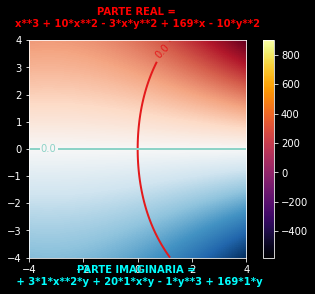



RECUERDE: las raíces que busca son todas las intersecciones entre las graficas azul y roja
Por favor, cierre el gráfico para continuar
Ingresa el # de raíces que deseas calcular: 1
Hallar el intercepto #1 


      A continuación escoge con qué método quieres hallar tus raíces:

        BISECCIÓN[0].      INTERPOLACIÓN[1].     NEWTON-RAPHSON[2].

      TENGA EN CUENTA. Si deseas hallar una raíz compleja, debes
      selccionar únicamente Newton-Raphson[2]. 
      
      TENGA EN CUENTA. Las gráficas de error se le mostraran al momento 
      en el que ingrese[0] para salir del menú principal.

      2

|||||Hallar intercepto #1 NEWTON-RAPHSON|||||

Su función en variable compleja es= x**3 + 3*I*x**2*y + 10*x**2 - 3*x*y**2 + 20*I*x*y + 169*x - I*y**3 - 10*y**2 + 169*I*y
parte real del polinomio= x**3 + 10*x**2 - 3*x*y**2 + 169*x - 10*y**2 
parte imaginaria del polinomio=  + 3*I*x**2*y + 20*I*x*y - I*y**3 + 169*I*y


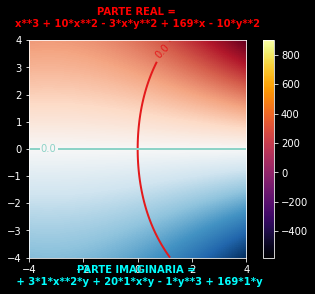


RECUERDE las raíces que busca son todas las intersecciones entre las graficas azul y roja
Por favor, cierre el gráfico para continuar



Ingrese la semilla [Real o Compleja] para el método de Newton-Raphson
(Si es compleja recuerde escribirla como conjugado= x+yj): -4+11j

Ingrese el # de cifras significativas que desea considerar en su metodo(debe ser # entero): 5

Determine el número límite de iteraciones que desea realizar (debe ser # entero. 200 recomentadadas)= 1000
  Iteración  ...                                    Error 
0         1  ...  (-5.294876631706029+12.030860937146306j)
1    (1+0j)  ...  (341.22041964717647-162.69637734076818j)
2    (1+0j)  ...   (180970.91962709377+247201.0806049327j)

[3 rows x 6 columns]

                      ¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡
                      ### ADVERTENCIA, EL MÉTODO NO CONVERGE. Es probable que la funcion no tenga intercepto 
                      ###   real con el eje 

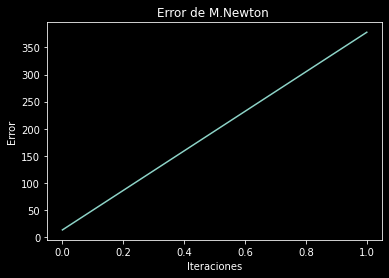




Bienvenid@ al programa de cálculo de raíces Reales y Complejas de una Funcion.

A continuación se le presentarán tres posibles métodos numéricos
con los cuales puede lograr tales fines: Bisección, interpolación y Newton-Raphson.

....Para continuar, haga click en la barra de input y oprima Enter.
....Escriba [0] en el input y oprima Enter para Salir.




In [ ]:
''' Importar los modulos especificos de las librerías para ahorrar espacio de la RAM'''
from matplotlib.pyplot import * 
from numpy import * #exp,arange, linspace, absolute, log10,where, delete, argwhere
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from sympy import symbols,init_printing,expand,I,diff, Interval, oo, ln, log,expand_trig
from sympy.calculus.util import continuous_domain
from sympy.parsing.sympy_parser import *
from sympy.sets.sets import Union
from mpl_toolkits.mplot3d import Axes3D #Nos ayudara a crear los tres ejes como objetos 
from matplotlib import cm #por "color maps"
import pandas as pd
from pandas import DataFrame  
#from scipy.misc import *
x, y = symbols('x,y')
init_printing(use_unicode=False, wrap_line=False)


########## LÍMITES DE LA GRÁFICA Y ESTILO ##########

xl , xL= -20 , 20
yl , yL= -5 , 5
style.use('dark_background')

Lx,LX = xl , xL
Ly,LY = yl , yL
#ds = 3#Drawstyle

############################################ 1. Definicion de funciones que estarán en el proceso#########################################



#¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢FUNCIÓN, DERIVADA Y CONTINUIDAD¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢#
def f(x):
  y= eval(evaluar)#La funcion eval permite al usuario escribir el polinomio que desee directamente en el input y con funciones especiales de cualquier libreria importada.
  return y
'''·········································································································'''  
def f_p(y,c,n):# ESta función aplica una derivada simbólica, y por lo tanto exacta, al string que se le aplique en sintaxis de Python.
  x= symbols('x')
  y_p = diff(eval(y),x,n)
  x=c
  y_p= eval(str(y_p))
  return y_p
'''·········································································································'''  
def continuo(Function, r, s):
  funcion = parse_expr(Function)
  x=symbols("x")
  inter = Interval(r,s)
  u = continuous_domain(funcion,x,Interval(r,s))
  if u == inter:
    q = True
  else:
    q = False
  return q
#¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢CONVERTIR X A VARIABLE COMPLEJA¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢#

def split_multiple(string, separadores):#funcion para separar con todo tipo de caracter que se quiera, una string.
    a = [string]
    for sep in separadores:
        string, a = a, []
        for seq in string:
            a += seq.split(sep)
    return a
'''·········································································································'''    
def insertar(string, caracter, indice):#Esta funcion se creó para insertar caracteres en una string
    return string[:indice-1] + caracter + string[indice-1:]
'''·········································································································'''  
def Variable_compleja(string):#Esta funcion convierte a todos los caracteres 'x' de la función en (x+y*I) y prepara la función compleja para graficar.
  if ('log' in string) :#Funciones de reemplazo para logaritmos
    string=string.replace('log(x)','log(y)')
    string=string.replace('log10(x)','log10(y)')
    string=string.replace('log2(x)','log2(y)')
    string=string.replace('ln(x)','log(y)')
    string=string.replace('log5(x)','log5(y)')
  if 'I' in string:#Si ya está el símbolo 'I', significa que el polinomio ya está en variable compleja.
    True
  elif 'x' in string:
    string=string.replace('x','(x+y*I)')
  
 
  R=str(expand(eval(string)))#Expandimos el polinomio complejo.
  print('Su función en variable compleja es=',R)
  if ('sin' in string) or('cos' in string) or ('tan' in string):#Expande trigonometricos
      R=str(expand_trig(eval(R)))

  if 'log' in R:
    R=R.replace('log(y)','log(x**2 +y**2) + I*3.1416')
    R=R.replace('log10(y)','(log(sqrt(x**2 +y**2))/log(10)) + I*3.1416')
    R=R.replace('log2(y)','(log(sqrt(x**2 +y**2))/log(2)) + I*3.1416')
    R=R.replace('log5(y)','(log(sqrt(x**2 +y**2))/log(5)) + I*3.1416')

  '''1° Separaremos las expresiones por sus signos para no perder estos mismos y separar las imaginarias de las reales'''
  signos=[]
  cnt=0
  d=''
  for i in R:
      if i=='+' or i=='-':
          R=insertar(R,',',cnt)
          cnt+=1
      cnt+=1#En este modelo de separación quedará siempre un espacio resagado, por lo cual se debe sumar adicional al contador.

    
  chain=split_multiple(R,[','])

  '''2° separamos las expresiones imaginarias de las reales en listas.'''
  imaginario=[]#Lista que contendra expresiones imaginarias
  real=[]#Lista que contendra expresiones reales
  for i in chain:
      if 'I' in i:
          imaginario.append(i)
      else:
          real.append(i)

  '''3° Convertimos estas expresiones a strings y las unimos para crear dos funciones distintas(Una con las expresiones reales y otra con las complejas)'''
  separardor=','
  imag=''#caracter imaginario
  r=''#caracter real
  for i in range(len(imaginario)):
      imag=imag+imaginario[i]
  for i in range(len(real)):
      r=r+real[i]

  print('parte real del polinomio=',r,'\nparte imaginaria del polinomio=',imag)#los resultados 'r' e 'imag' son guardados en tipo string para poderse someter a la funcion 'eval'

  '''4° Por último, removemos I de la parte imaginaria para poderla operar como a una funcion cualquiera'''
  #Si 'I' esta sola es equivalente a I*1, solo queda 1
  imag=imag.replace('I','1')
 
  return r, imag
   
################################################## Graficar Función #################################################
def graficar(a = None,x1=None,x2=None,y1=None,y2=None,x0 = None):# Sin parametros cuando se requiera mostrar el intercepto 

    if a != None:
        annotate('Intercepto : [{:.3f},{:.3f}]'.format(x0,0) , xy=(m, 0), xytext=(x0+1, f(m)+3), bbox = {'facecolor': 'lightsteelblue' , 'alpha' : 0.5 , 'pad':10},
             arrowprops=dict(shrink=0.05 , facecolor='lime'))# Indicador de intercepto
             
    if x1 == None and x2 == None and y1 == None and y2 == None:
        x1,x2= xl,xL
        y1,y2= yl,yL
     
    figsize =(20,20)
    xlim(x1,x2)
    ylim(y1,y2)
    grid(c = "white")
    tight_layout()
    title("Grafica Funcion f(x)= " + evaluar)
    xlabel("X")
    ylabel("Y")
    plot([x1,x2],[0,0] , c = "red" , linewidth = 1.5) # Eje X
    plot([0,0],[y1,y2], c = "red" , linewidth = 1.5)  # Eje Y 
    plot(dom,f(dom) , c ="aqua")
    show()
'''·········································································································'''  
#¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢Funcion de trazos¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢¢#
def graficar_complejo(evaluar):
  if ('log' in evaluar) or ('sin' in evaluar )or ('cos' in evaluar) or ('tan' in evaluar) or ('ln' in evaluar) or ('sec' in evaluar) or ('csc' in evaluar) or ('cot' in evaluar):
    graficar()
  else:
    r,imag=Variable_compleja(evaluar)
    '''1° Creación de la funcion y del dominio'''
    #Dominio:
    X = linspace(-4.0,4.0,100)
    Y = linspace(-4.0,4.0,100)
    x,y = meshgrid(X, Y, sparse=True) # grid of point
    Z = eval(r) # evaluation of the function on the grid
    Z2= eval(imag)
    if Z.shape==(1,100):
      #graficar()
      True
    else:

      #print(x,Z)
      #or ('sin' in r )or ('sin' in imag) or ('cos' in r) or ('cos' in imag)

      '''2° Plotting de las curvas de nivel desde plano xy y visualización de interceptos'''
      style.use('dark_background')


      im = imshow(Z,cmap=cm.inferno,extent=(-4,4,-4,4)) # El mapa de color son los estratos de la funcion segun su profundidad #Vmin y vmax representa el intervalo de la función Z
      im2 = imshow(Z2,cmap=cm.RdBu,extent=(-4,4,-4,4))
      # Se añaden las lineas de contorno a la gráfica(Las proyecciones en el plano xy de las funciones y aquello que mas nos interesa
      contorno = contour(X,Y,Z,arange(0,1,1),linewidths=2,cmap=cm.Set1) #Determina el paso entre curvas de nivel y su color y tamaño// Set# determina el set de colores de las lineas, hay hasta Set3
      contorno2 = contour(X,Y,Z2,arange(0,1,1),linewidths=2,cmap=cm.Set3)
      clabel(contorno,inline=True,fmt='%1.1f',fontsize=10)#Coloca etiquetas en los contour(cruvas de nivel en nuestro caso)
      clabel(contorno2,inline=True,fmt='%1.1f',fontsize=10)
      colorbar(im) # Colocar la barra de colores
      text(0,4.5,'PARTE REAL = \n'+r,fontsize=10,fontweight='bold',ha='center',color='red')
      text(0,-5,'PARTE IMAGINARIA = \n'+imag,fontsize=10,fontweight='bold',ha='center',color='cyan')
      show()

################################################## Graficar Errores #################################################
def graficar_errores(met,Lista_Error):
  x1,x2= xl,xL
  y1,y2= yl,yL

  figsize =(20,20)
  xlim(0,len(Lista_Error))
  ylim(-0.5,101)
  grid(c = "white")
  tight_layout()
  title("Grafica Error de " + met + " Funcion f(x)= " + evaluar)
  xlabel("X")
  ylabel("Y")
  plot([x1,x2],[0,0] , c = "red" , linewidth = 1.5) # Eje X
  plot([0,0],[y1,y2], c = "red" , linewidth = 1.5)  # Eje Y 
  plot(Lista_Error, c ="aqua")

########################################################### 2. COMENZAMOS INTERACCIÓN  #####################################################







''' 1º Iniciamos while para repetir metodo hasta que el mismo usuario corte'''
while True:#El método esta dentro de un loop para que este pueda ser repetido por el usuario las veces que se quiera
    print("\n\n\nBienvenid@ al programa de cálculo de raíces Reales y Complejas de una Funcion.\n\nA continuación se le presentarán tres posibles métodos numéricos\ncon los cuales puede lograr tales fines: Bisección, interpolación y Newton-Raphson.\n\n....Para continuar, haga click en la barra de input y oprima Enter.\n....Escriba [0] en el input y oprima Enter para Salir.\n\n")
    user = input("Seleccion : ")
    if user =="0":
        break
        
    ''' 2º Input de la funcion '''
    evaluar=input(r"""


      Escribe en sintaxis de Python la funcion que quieres evaluar.
      IMPORTANTE: Para multiplicación: * y no'x',para potenciación ** y no '^',
      para raíz cuadrada sqrt(), o para cualquier raíz usar exponente (e.g.= x**(1/3))
      
      TAMBIÉN, recuerda el correcto uso de parentesis distributivos. 
      La funcion puede contener funciones trigonometricas,logaritmos 
      positivos(ln,log10(x), log2, etc...),funcion de neper('exp()'), etc
      (si son funciones especiales, no debes especificar librerias, 
      e.g: sin(x) se escribe 'sin(x)', no 'numpy.sin(x)')

      Y = """) #Funcion escrita por el usuario
    
      
    ''' 4º Creamos dominio para las graficas y para la función, teniendo en cuenta los casos especiales. '''    
    dom = linspace(-100,100,1000) # Dominio de la funcion f(x) 
    #####CASOS ESPECIALES#####
    if 'log' in evaluar:# Condicional que hace el dominio positivo en caso de logaritmo.
        dom=linspace(0.1,100,1000)
        
    '''' 5º Visualización de los interceptos. Se da a elegir al usuario entre conocer si sus interceptos son complejos o no y se da a escoger grafica. Se explica funcionalidad gráficas a trazos ''' 
    graph=int(input(r""" 
    -----------------------------------------------------------------------------------
    A continuación se presentará en tu pantalla un gráfico para que
    te sea más facil escoger el intervalo(o semilla) en donde convergerá
    tu método. Debes escoger entre dos formatos de gráficas: 

    1. escribe '1' en la línea de input ([1]) si deseas observar la 
       gráfica de cualquier función en el dominio de los reales (aquí 
       solo podrás visualizar las raíces reales de tu función).
    
    2. escribe '2' en la línea de input ([2]) si tienes un polinomio
       sin funciones especiales (sin, cos, tan, log, exp, etc... Si tiene
       alguno de estos graficara automaticamente en el primer formato) 
       y si deseas observar todas las raíces existentes de tu polinomio, 
       incluyendo sus raíces complejas. 

       Este gráfico se basa en el "método gráfico de las dos curvas"(Chapra, pag 144),
       en donde, al descomponer la función en dos funciones distintas(su 
       parte real y su parte imaginaria) graficamos dos funciones en el mismo 
       plano. Los puntos en donde se interceptan las curvas roja y azul,
       son las raíces que buscas. 
       TENGA EN CUENTA, en este formato gráfico, tu raíz, al ser compleja, depende
       de ambas coordenadas en el plano x,y, donde la coordenada en 'x' es la 
       parte real y la coordenada en 'y' es la parte imaginaria. Es decir
       la raíz conjuda que buscas tiene la forma de = (x + yj). 
       
       Por ejemplo, 
       si el punto de intersección es (3,0) significa que la raíz tiene parte
       real=3 y parte imaginaria=0. En éste caso especial, aunque graficada con
       las demás raíces complejas, la raíz es real y para hallarla se puede hacer
       uso de cualquiera de los tres métodos presentados.

       GRACIAS!
        

    Selección:"""))

    if graph== 1:
      graficar()
      print('\n\nPor favor, cierre el gráfico para continuar')

    elif graph== 2:
      graficar_complejo(evaluar)
      print('\n\nRECUERDE: las raíces que busca son todas las intersecciones entre las graficas azul y roja\nPor favor, cierre el gráfico para continuar')

    ''' 6º Después de la visualización viene el input de la primera(o única) raíz y su tratamiento y la defincición de la tolerancia de cifras significativas por el usuario '''
    raices = abs(int(input("Ingresa el # de raíces que deseas calcular: ")))# Numero de raíces
    tol = 2000
    
    for i in range(raices):#INICIA CICLO DE RAÍCES. POR CADA RAÍZ UN CICLO
      ''' 7º Escoger método '''
      print("Hallar el intercepto #%i "%(i+1))
      metodo=int(input(r"""

      A continuación escoge con qué método quieres hallar tus raíces:

        BISECCIÓN[0].      INTERPOLACIÓN[1].     NEWTON-RAPHSON[2].

      TENGA EN CUENTA. Si deseas hallar una raíz compleja, debes
      selccionar únicamente Newton-Raphson[2]. 
      
      TENGA EN CUENTA. Las gráficas de error se le mostraran al momento 
      en el que ingrese[0] para salir del menú principal.

      """))
      
      


      if metodo==0 :######### BISECCIÓN ###########
        print("\n||||-Hallar intercepto #%i con BISECCIÓN||||\n"%(i+1))

        print('\n\nA continuación se le presentará una gráfica interactiva para que tenga la libertad de escoger el intervalo en que desea encontrar la raíz que busca\n\n')
        graficar()
        print('Por favor, cierre el gráfico para continuar\n')

        a = 0
        b = 1

        #Ingresos de datos por parte del usuario

        while True:
          while True:
            try:
              a=float(input('\n\nIngrese el limite inferior: '))
              b=float(input('Ingrese el límite superior: '))
              cs=int(input('Ingrese la cantidad de cifras significativas que desea obtener: '))
              break
            except ValueError:
              print("Ingrese un numero válido")
          if a < b and cs % 1 == 0 and cs > 0:
            break
          elif a >= b:
            print('El valor de a debe ser diferente y menor que el de b, vuela a ingresar los valores\n')
          else:
            print('El valor de cifras significativas debe ser un entero positivo \ncorrespondiente a la cantidad de dígictos decimales que quiere para la raíz, vuela a ingresar los valores\n')

        n_lim = 1000
        cs_lim = eval('log10(2**n_lim/(b-a))')

        #permite definir un limite de iteraciones segun las cs deseadas
        n = int(1 + round(eval('(cs + log10(b-a))/log10(2)')))

        fa = f(a)
        fb = f(b)

        if n > n_lim:       #se verifica que no exceda los límites preestablecidos para la precisión del método
          print('\n\nSus expectativas de este programa son demasiado altas así que \nasumiremos el máximo de cifras significativas por usted como', cs_lim)
        elif fa*fb > 0:       #se verifica que la función corte el eje x y que sea estrictamente creciente o decreciente
          print('\n\nHa escogido valores de a y b inapropiados ya que la función no \natraviesa el eje x, verifique nuevamente en la gráfica con el zoom\n\n')
        elif continuo(evaluar,a,b) == False:      #se verifica la continuidad de la función dentro del intervalo seleccionado
          print('\n\nLa función que ingresó no es continua en el intervalo seleccionado\n\n')
        else:     #cumplió con todos los condicionales anteriores, luego se comienza la aplicación del método

          DF = DataFrame(columns=['a','b','c','F(c)','Ea'])
          DF.loc[0] = ['','','','','']
          Ea_Bisecc = []     #Lista de errores aproximados por iteración para gráfica de errores 
          c0 = a            #valor de c en la iteración anterior, acá vale a por referencia
          c = (a+b)/2
          fc = f(c)
          
          for i in range(1,n + 1):
            c0 = c
            c = (a+b)/2
            fc = f(c)
        
            #se agregan las filas para la tabla de resultados de acuerdo a si es posible calcular el error aproximado Ea y se agraga a la lista Ea_lista
            if c != 0:      
              if i != 1:
                Ea = 100*abs((c-c0)/c)
                DF.loc[i] = [round(a,4), round(b,4), round(c,cs+1), round(fc,4), Ea]
                Ea_Bisecc.append(Ea)
              else:
                DF.loc[i] = [round(a,4), round(b,4), round(c,cs+1), round(fc,4), '']
                Ea_Bisecc.append('')
            else:
              DF.loc[i] = [round(a,4), round(b,4), round(c,cs+1), round(fc,4), '']
              Ea_Bisecc.append('')
                  
            if fc == 0:   #en caso de encontrar la raiz en alguna iteracion
              a = c
              b = c
              break
            elif fa*fc < 0:     #seleccion del subintervalo izquierdo
              b = c
              fb = fc
            else:               #seleccion del subintervalo derecho
              a = c
              fa = fc
          
          print('\n\nAcontinuacion la tabla con los resultados por iteración\n\n')
          print(DF)
          
          Er = abs(b-a)*100
          print('\n\nSu resultado final por el método de bisección fue', round(c,cs+1))
          print('Con un error real y aproximado de', round(Er,4), round(Ea,4), 'respectivamente')
          print('Con un total de iteraciones de', n)
          graficar_errores('Bisección',Ea_Bisecc[1:])
      '''--------------------------------------------------------------------------------------------'''
      if metodo==1:################# ITERPOLACIÓN #################
        print("\n||||-Hallar intercepto #%i con INTERPOLACIÓN||||\n"%(i+1))
        graficar()
        print('Por favor, cierre el gráfico para continuar\n')

        while True:
    
          ## Ingreso datos:
          
          # Ingreso limite inferior
          while True:
            a0 = input('Ingrese el limite inferior: ')
            try:
              a=float(a0)
              break
            except ValueError:
              print("Ingrese un numero válido")
          
          # Ingreso limite superior
          while True:
            b0 = float(input("Ingrese el limite superior: "))
            try:
              b=float(b0)
              break
            except ValueError:
              print("ingrese un numero valido")
          
          # Evaluar orden
          if a >= b:
            print("Valores incorrectos, por favor ingrese un valor de a que sea menor a un valor b.")
            
          # Evaluar continuidad
          elif continuo(evaluar,a,b) == False:
            print("la funcion no es continua en este intervalo, ingrese un intervalo que si cumpla esta condicion.")
            
          else:
            # Ingreso cifras significativas
            while True:
              n = int(input("Ingrese la cantidad de cifras significativas para la aproximacion final: "))
              try:
                CS=int(n)
                break
              except ValueError:
                print("ingrese un numero valido")
            
              
            ## Variables de inicio
            
            Es = 0.5*(10**(2-CS)) # Error de referencia
            a1=a
            b1=b
            Fa = f(a1)
            Fb = f(b1)
            it = 0 # Cantidad de iteraciones totales
            ia = 0 # Cantidad de repeticiones del limite inferior
            ib = 0 # Cantidad de repeticiones del limite superior
            Xf = a1 # Comparacion inicial
            Ea_Interp = []
            df = DataFrame.from_dict({"0":[a1,b1,"","",""]},orient="index",columns=["a", "b", "Xm", "f(Xm)", "Ea(%)"]) # tabla
            
            ## Inicio de las iteraciones
            while True:
              Xi = Xf # Valor previo
              Xf = b1 + ((-Fb)*(a1-b1)/(Fa-Fb)) 
              Fi = f(Xi)
              Ff = f(Xf) 
              it += 1
              Xr = round(Xf,CS+1)
              if Ff == 0: # Condicion de paro: caso que se obtenga el cero exacto
                df.loc[it]=[round(a1,4),round(b1,4),Xr,round(Ff,4),""] # añade fila a la tabla
                result = "el cero se encuentra en: {:} con un error de: {:}% en {:} iteraciones".format(Xr,abs(Ea),it)
                
                break
              
              if it == 1000: # Condicion de paro: Limite maximo de iteraciones totales
                  result = "no se encontro ninguna solucion para la tolerancia luego de 1000 iteraciones"
                  break
              
              if Xf != 0:
                Ea = abs((Xi-Xf)/Xf)*100 # Error aproximado
                Ea_Interp.append(Ea)
                if Ea < Es: # Condicion de paro: error aproximado valido
                  df.loc[it]=[round(a1,4),round(b1,4),Xr,Ff,Ea] # añade fila a la tabla
                  result = "el cero se encuentra en: {:} con un error de: {:}% en {:} iteraciones".format(Xr,abs(Ea),it)
                  
                  break
                
              if Ff * Fa < 0: # Se cambia de limite superior
                b1 = Xf
                Fb = f(b1)
                ib = 0
                ia += 1
                if ia >= 2: # Se excede las iteraciones con igual limite inferior
                  Fa /= 2
              
              elif Ff * Fb < 0: # Se cambia de limite inferior
                a1 = Xf
                Fa = f(a1)
                ia = 0
                ib += 1
                if ib >= 2: # Se excede las iteraciones con igual limite inferior
                  Fb /= 2
              df.loc[it]=[round(a1,4),round(b1,4),Xr,Ff,Ea] # añade fila a la 
              
            break

        print('\n\n',df)
        print(result)
        graficar_errores('Interpolación',Ea_Interp[1:])

      '''--------------------------------------------------------------------------------------------'''
      if metodo==2:################# NEWTON #####################
        print("\n|||||Hallar intercepto #%i NEWTON-RAPHSON|||||\n"%(i+1))
        graficar_complejo(evaluar)
        print('\nRECUERDE las raíces que busca son todas las intersecciones entre las graficas azul y roja\nPor favor, cierre el gráfico para continuar\n')

        ''' 1º Inicia Newton-Raphson con Determinación de la semilla.'''
        while True:#Excepción para cifras cignificativas
          s = complex(input("\n\nIngrese la semilla [Real o Compleja] para el método de Newton-Raphson\n(Si es compleja recuerde escribirla como conjugado= x+yj): "))#Input de la semilla 
          try:
            type(s)==complex
            break
          except ValueError:
            print("\n\nERROR: ingrese un numero\n\n") 
        
        if s.imag ==0:#Si no hay raíz compleja, eliminar formato complejo para ahorrar espacio memoria.
          s = s.real

        continua=False
        while continua==False:#Ciclo Prueba de Continuidad:
          if s.imag!=0:
            continua=True
          else:
            continua= continuo(evaluar, s-5, s+5)#Variable condicionante 
            if continua==False:
              continuo(evaluar, s-5, s+5)
              s = complex(input("\nIngrese semilla  [Real o Compleja] para el método de Newton-Raphson : "))#Input de la semilla
              print("  ")
            else:
              break

        if ('log' in evaluar) and (s.real <=0):#Funcion que se cersiora de la continuidad del metodo en caso de logaritmo
          print(r"""

                      ¡¡¡ERROR:La funcion contiene logaritmo, la semilla no puede ser un número negativo!!!
                                             'Tu número será convertido a positivo'


              """)
          if s.real < 0:# Nos cersioramos de que la raíz aplicada al logaritmo sea positiva.
              
              s = complex(abs(s),s.imag)
          if s.real == 0: # Nos cersioramos de que la raíz aplicada al logaritmo sea diferente de 0.
              s = complex(0.01,s.imag)# Convertimos el 0 a una aproximación de 0.

        while True:#Excepción para cifras cignificativas
          cifras_sig= int(input("\nIngrese el # de cifras significativas que desea considerar en su metodo(debe ser # entero): "))#Se aplica desde el input el numero de cifras significativas
          try:
            type(cifras_sig)==int
            break
          except ValueError:
            print("\n\ningrese un numero valido para las cifras significativas (entero)\n\n") 
        while True:#Excepción para # iteraciones
          T_iteraciones= int(input('\nDetermine el número límite de iteraciones que desea realizar (debe ser # entero. 200 recomentadadas)= ')) #Numero máximo de iteraciones
          try:
            type(T_iteraciones)==int
            break
          except ValueError:
            print("\n\ningrese un numero valido para las Iteraciones (entero)\n\n") 
         
        Es=(0.5*10**(2-cifras_sig))# Ecc. 3.7 del libro guía Chapra. Se determina que, con este valor las cifras significativas deseadas son exactas y despues de alcanzadas, las que siguen solo son aproximación.
        


        ''' 2º Comienza procedimiento matemático. Éste se muestra al usuario en tablas '''
        Error_newton = [0]*T_iteraciones #Creación de matrices de ceros, método append ocupa mucho espacio en memoria y procesador.
        raiz= [0]*T_iteraciones
        funcion= [0]*T_iteraciones
        derivada= [0]*T_iteraciones
        relación_funcion_derivada=[0]*T_iteraciones      
        advertencia = False
        advertencia2 = False
        Ea_Newton = []

        DF = DataFrame(columns=['Iteración','Xk','f(Xk) ',"f'(Xk)","f(Xk)/f'(Xk)",'Error '])
        DF.loc[0] = ['','','','','','']
        
        for iteracion in range(T_iteraciones):
          if f_p(evaluar,s,1) ==0:#Si la derivada es cero y hay indeterminación, el metodo para. Esto solo pasaría si ya no hay mas incognitas en el polinomio y por ende ya se encontró la raíz.
            advertencia2 = True
            break

          xk_1 = s - (f(s)/f_p(evaluar,s,1))#Fórmula del método.
          if iteracion <= 0:
            En=xk_1
          else:
            En=(0.5)*f_p(evaluar,s,1)/f_p(evaluar,s,2)*(Error_newton[iteracion-1])**2#Fórmula del Error de Truncamiento.
          i_newton = iteracion#Variable iteraciones Newton para comparativa final entre métodos.

          DF.loc[iteracion] = [i+1,s, f(s), f_p(evaluar,s,1), f(s)/f_p(evaluar,s,1), En]

          if (abs(En) <= Es):
            Error_newton[iteracion]=En
            break
          elif (abs(En) >= tol):
            advertencia = True
            break
          else:
            Error_newton[iteracion]=En
            s = xk_1
        print(DF)

        ''' 3º Advertencias sobre divergencia '''          
        if advertencia:
            print(r"""
                      ¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡
                      ### ADVERTENCIA, EL MÉTODO NO CONVERGE. Es probable que la funcion no tenga intercepto 
                      ###   real con el eje X, o que haya escogido una semilla muy alejada del intercepto ###
                      !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!""")
        elif advertencia2:
            print(r"""
                      ¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡
                     "### ADVERTENCIA, F'(x)=0, DIVISIÓN ENTRE 0, escoga otra semilla que no cause conflicto ####
                     "!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!""")
        else:
            print("\nLa raiz hallada por método de Newton - Rasphson  fue |{}|, de la cual {} son cifras significativas \nCon un error de {} \nY {} iteraciones".format(xk_1,cifras_sig,En,i_newton+1))
        Error_newton=absolute(Error_newton)
        Error_newton=delete(Error_newton, argwhere( (Error_newton<= 0.000000001)))
        Error_i=log10(Error_newton)#Lista que permite modelar la evolucion del error del metodo de Newton
        ''' 4º Display de datos finales ''' 
        if len(Error_newton) >1:        
          
          title("Error de M.Newton ")
          xlabel("Iteraciones")
          ylabel("Error")
          plot(Error_newton)
          show() 

        if raices> 1:#Creamos lista de interceptos para mostrar todos los resultados al final.
          Raíces=[0]*raices
    #####Grafica de error········

    

